In [3]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [351]:
def stabilityPlot(handle):
    x = np.linspace(-5, 5, 500)
    y = np.linspace(-5, 5, 500)
    [X,Y] = np.meshgrid(x, y)
    stab = np.zeros(np.shape(X))
    for i in range(len(x)):
        for j in range(len(y)):
            z = X[i][j] + 1j*Y[i][j]
            stab[i][j] = abs(handle(z))<1
    plt.contourf(X,Y,stab,2)  
    plt.xticks(np.arange(-5,6,1))
    plt.yticks(np.arange(-5,6,1))
    plt.gca().set_aspect('equal', adjustable='box')

In [352]:
def RK4(func, y0, tf, tStep):
    
    t0 = 0
    n = int((tf - t0)/tStep)
    
    t = np.zeros(int(n+1))
    y = np.zeros(int(n+1))
    
    t[0] = t0
    y[0] = y0
    
    for i in range(0, n):
        f1 = func(t[i],y[i])
        f2 = func(t[i] + tStep/2,y[i]+ tStep * f1/2)
        f3 = func(t[i] + tStep/2,y[i]+ tStep * f2/2)
        f4 = func(t[i] + tStep, y[i] + tStep * f3)
        
        t[i+1] = t[i] + tStep
        y[i+1] = y[i] + tStep * (f1 + 2*f2 + 2*f3+ f4) / 6
        
    return y,t

relative error = [3.6082055822595573e-06, 1.895091146116653e-07, 1.0457513989044157e-08, 6.057964805036296e-10, 3.629562585647513e-11]
The rate of convergence is: 4.150281580392177


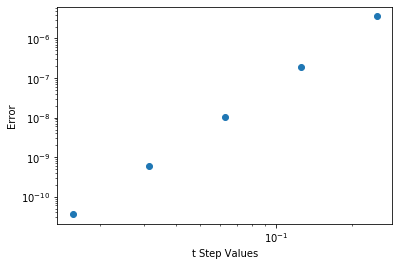

In [388]:
realfunc = lambda x: -np.exp(1-np.cos(x))
func = lambda t, y: y*np.sin(t)
y0 = -1
tf = 1 
tStep = [1/4, 1/8, 1/16, 1/32, 1/64]

y1, t1 = RK4(func, y0, tf, tStep[0])
y2, t2 = RK4(func, y0, tf, tStep[1])
y3, t3 = RK4(func, y0, tf, tStep[2])
y4, t4 = RK4(func, y0, tf, tStep[3])
y5, t5 = RK4(func, y0, tf, tStep[4])
ys = [y1[-1], y2[-1], y3[-1], y4[-1], y5[-1]]

realy = realfunc(1)
realys = [abs((i-realy)/realy) for i in ys]
print("relative error =", realys)

slope = (np.log(realys[-1])-np.log(realys[0]))/(np.log(tStep[-1])-np.log(tStep[0]))
print("The rate of convergence is:", slope)

plt.loglog(tStep, realys, 'o')
plt.xlabel('t Step Values')
plt.ylabel("Error")
plt.show()

In [378]:
# equation for all runge kutta methods' stability
# RK# --> G = 1 + lamb*h + (lamb*h)**2/2! + (lamb*h)**3/3! + ... + (lamb*h)**n/n!

# RK4 = 1 + lamb*h + (lamb*h)**2/2! + (lamb*h)**3/3! + (lamb*h)**4/4!
# lamb * h = z
# RK4 = 1 + z + (z**2)/2 + (z**3)/6 + (z**4)/24

# OR 

# y[n+1] = yn + 1/6*k1 + 1/3*k2 + 2/3*k3 + k4/6
# apply to y' = lambda*y

# k1 = hf(tn,yn)
# k2 = hf(tn + h/2, yn - k1/2)
# k3 = hf(tn + h/2, yn + 3/4*k1 - k2/4)
# k4 = hf(tn + h, yn - 2*k1 + k2 + 2*k3)

# k1 = H*yn
# k2 = H * (1 - H/2)*yn
# k3 = H * (1 + 3/4*H - H/4*(1 - H/2))*yn
# k4 = H * (1 - 2*H + H*(1 - H/2) + 2*H*(1 + 3/4*H - H/4*(1 - H/2)))*yn

# H = z

# sub back into y[n+1]
# y[n+1] = yn + 1/6*z(Yn) + 1/3*(z*yn + 1/2*(z**2)*yn) + 1/3(z*yn + 1/2*(z**2)*yn + 1/4*(z**3)*yn) + 1/6*(z*yn + (z**2)*yn + 1/2*(z**3)*yn + 1/4*(z**4)*yn)
# y[n+1] = [1 + z + z**2/2 + z**3/6 + h**4/24]yn
# g = 1 + z + (z**2)/2 + (z**3)/6 + (z**4)/24

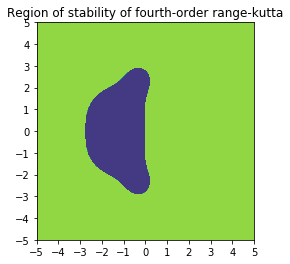

In [379]:
g = lambda z: abs(1+z+(1/2)*(z**2) +1/6*(z**3)+1/24*(z**4)) <= 1
stabilityPlot(g)
plt.title('Region of stability of fourth-order range-kutta')
plt.show()

In [380]:
def RK4New(func, y0, tf, tStep):
    
    t0 = 0
    n = int((tf - t0)/tStep)
    
    t = np.zeros(int(n+1))
    y = np.zeros(int(n+1))
    
    t[0] = t0
    y[0] = y0
    
    for i in range(0, n):
        f1 = func(t[i],y[i])
        f2 = func(t[i] + tStep/2,y[i]+ tStep * f1/2)
        f3 = func(t[i] + tStep/2,y[i]+ tStep * f2/2)
        f4 = func(t[i] + tStep, y[i] + tStep * f3)
        
        t[i+1] = t[i] + tStep
        y[i+1] = y[i] + tStep * (f1 + 2*f2 + 2*f3+ f4) / 6
        
    return y

In [381]:
def AdamsBashforth(f, y0,tf,tStep,m):
    t0 = 0
    n = int((tf - t0)/tStep)
    t = np.arange(t0,tf+tStep,tStep)
    y = np.zeros(n+1)
    y[0:m] = RK4New(f,y0,t0+(m-1)*tStep,tStep) #(func, y0, tf, tStep):
    
    if m == 2:
        for i in range(m-1, n):
            K1 = f(t[i-1],y[i-1])
            K2 = f(t[i],y[i])
            y[i+1] = y[i] + tStep*(3*K1-1*K2)/2   

        return y, t
    
    if m == 3:
        K1 = f(t[1],y[1])
        K2 = f(t[0],y[0])
        for i in range(m-1,n):  
            K3 = K2
            K2 = K1
            K1 = f(t[i],y[i])
            y[i+1] = y[i] + tStep*(23*K1-16*K2+5*K3)/12
    
        return y,t
    
    if m == 4:
        K1 = f(t[2],y[2])
        K2 = f(t[1],y[1])
        K3 = f(t[0],y[0])
        for i in range(m-1, n):
            K4 = K3
            K3 = K2
            K2 = K1
            K1 = f(t[i],y[i])
            y[i+1] = y[i] + tStep*(55*K1-59*K2+37*K3-9*K4)/24
    
        return y,t
    
    if m == 5:
        K1 = f(t[3],y[3])
        K2 = f(t[2],y[2])
        K3 = f(t[1],y[1])
        K4 = f(t[0],y[0])
        for i in range(m-1, n):
            K5 = K4
            K4 = K3
            K3 = K2
            K2 = K1
            K1 = f(t[i],y[i])
            y[i+1] = y[i] + tStep*(1901*K1-2774*K2+2616*K3-1274*K4+251*K5)/720

        return y,t

In [382]:
f = lambda t, y: y*np.sin(t)
y0 = -1
tf = 1
tStep = [1/16, 1/32, 1/64, 1/128, 1/256]

realfunc = lambda t: -np.exp(1-np.cos(t))
realy = realfunc(1)

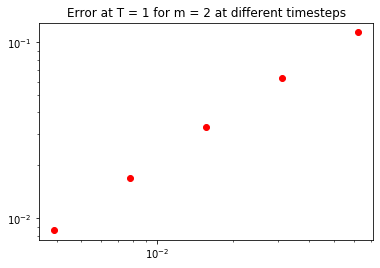

The rate of convergence is 0.9327142797748114


In [383]:
m = 2
m2 = []
for i in range(0,5):
    y2, t2 = AdamsBashforth(f, y0,tf,tStep[i],m)
    m2.append(y2[-1])
    
error2 = [abs((i-realy)/realy) for i in m2]

plt.loglog(tStep, error2, 'ro')
plt.title('Error at T = 1 for m = 2 at different timesteps')
plt.show()

slope = (np.log(error2[-1])-np.log(error2[0]))/(np.log(tStep[-1])-np.log(tStep[0]))
print("The rate of convergence is", slope)

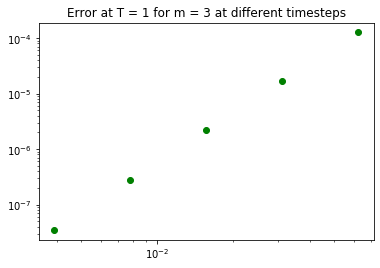

The rate of convergence is 2.9560947944141835


In [384]:
m = 3
m3 = []
for i in range(0,5):
    y3, t3 = AdamsBashforth(f, y0,tf,tStep[i],m)
    m3.append(y3[-1])
    
error3 = [abs((i-realy)/realy) for i in m3]

plt.loglog(tStep, error3, 'go')
plt.title('Error at T = 1 for m = 3 at different timesteps')
plt.show()

slope = (np.log(error3[-1])-np.log(error3[0]))/(np.log(tStep[-1])-np.log(tStep[0]))
print("The rate of convergence is", slope)

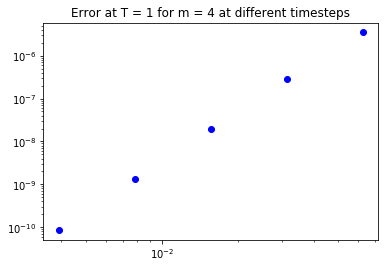

The rate of convergence is 3.827951016507931


In [385]:
m = 4
m4 = []
for i in range(0,5):
    y4, t4 = AdamsBashforth(f, y0,tf,tStep[i],m)
    m4.append(y4[-1])
    
error4 = [abs((i-realy)/realy) for i in m4]

plt.loglog(tStep, error4, 'bo')
plt.title('Error at T = 1 for m = 4 at different timesteps')
plt.show()

slope = (np.log(error4[-1])-np.log(error4[0]))/(np.log(tStep[-1])-np.log(tStep[0]))
print("The rate of convergence is", slope)

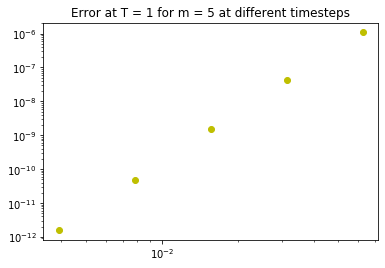

The rate of convergence is 4.845758902931101


In [386]:
m = 5
m5 = []
for i in range(0,5):
    y5, t5 = AdamsBashforth(f, y0,tf,tStep[i],m)
    m5.append(y5[-1])
    
error5 = [abs((i-realy)/realy) for i in m5]

plt.loglog(tStep, error5, 'yo')
plt.title('Error at T = 1 for m = 5 at different timesteps')
plt.show()

slope = (np.log(error5[-1])-np.log(error5[0]))/(np.log(tStep[-1])-np.log(tStep[0]))
print("The rate of convergence is", slope)

In [387]:
print("m=2 error is", error2)
print("m=3 error is", error3)
print("m=4 error is", error4)
print("m=5 error is", error5)

m=2 error is [0.1139971797399194, 0.06271169322424683, 0.03299845915063494, 0.01694194855287924, 0.00858606564869496]
m=3 error is [0.00012599385241187034, 1.6864511613599047e-05, 2.1748425224705744e-06, 2.759276792262667e-07, 3.4742138128113097e-08]
m=4 error is [3.4796798356900935e-06, 2.8189129974548857e-07, 1.9972648654581466e-08, 1.327648917347954e-09, 8.555137123080574e-11]
m=5 error is [1.0821517857971013e-06, 4.279622494405648e-08, 1.4948700738676332e-09, 4.9317860844918185e-11, 1.5827526681548478e-12]
